In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from itertools import combinations
from matplotlib.colors import LinearSegmentedColormap

df = pd.read_csv('data-sets/game_reviews_users_Toxicity.csv')
df = df.dropna()
df = df[df['userType'] == 0]
#df = df[['title', 'review']]

# Filter DataFrame to only include rows with titles in the specified list

C:\Users\cotoq\AppData\Local\Temp\ipykernel_5368\1345244169.py:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data-sets/game_reviews_users_Toxicity.csv')


In [3]:
'''''
game_counts = df['title'].value_counts()

popular_games = game_counts[game_counts > 100].index
df = df[df['title'].isin(popular_games)]
user_groups = df.groupby('user')['title'].apply(list)

# Criar uma lista de arestas
edges = []

for games in user_groups:
    # Encontrar todas as combinações de jogos para cada usuário
    for combination in combinations(games, 2):
        edges.append(combination)

# Criar um DataFrame de arestas
edges_df = pd.DataFrame(edges, columns=['source', 'target'])

# Remover duplicatas (caso queira um grafo não direcionado)
edges_df = edges_df.drop_duplicates()

nodes = pd.DataFrame(df['title'].unique(), columns=['id'])

# Adicionar uma coluna 'label' para os rótulos
nodes['label'] = nodes['id']

nodes.to_csv('graph_nodes.csv', index=False)

# Salvar arestas
edges_df.to_csv('graph_edges.csv', index=False)
'''''

"''\ngame_counts = df['title'].value_counts()\n\npopular_games = game_counts[game_counts > 100].index\ndf = df[df['title'].isin(popular_games)]\nuser_groups = df.groupby('user')['title'].apply(list)\n\n# Criar uma lista de arestas\nedges = []\n\nfor games in user_groups:\n    # Encontrar todas as combinações de jogos para cada usuário\n    for combination in combinations(games, 2):\n        edges.append(combination)\n\n# Criar um DataFrame de arestas\nedges_df = pd.DataFrame(edges, columns=['source', 'target'])\n\n# Remover duplicatas (caso queira um grafo não direcionado)\nedges_df = edges_df.drop_duplicates()\n\nnodes = pd.DataFrame(df['title'].unique(), columns=['id'])\n\n# Adicionar uma coluna 'label' para os rótulos\nnodes['label'] = nodes['id']\n\nnodes.to_csv('graph_nodes.csv', index=False)\n\n# Salvar arestas\nedges_df.to_csv('graph_edges.csv', index=False)\n"

In [4]:
STOPWORDS = [
    'game', 'that', 'this', 'the', 'o', 'and', 'to', 'of', 'in', 'a', 'for', 'on', 
    'with', 'as', 'is', 'are', 'it', 'by', 'from', 'at', 'or', 'an', 'be', 'which', 
    'has', 'you', 'was', 'we', 'their', 'all', 'will', 'can', 'they', 'more', 'but', 
    'our', 'have', 'had', 'your', 'when', 'other', 'how', 'out', 'do', 'up', 'about', 
    'so', 'what', 'its', 'if', 'my', 'who', 'get', 'there', 'would', 'her', 'him', 
    'been', 'one', 'no', 'I', 'me', 'too', 'que', 'do', 'da','y', 'de', 'not', 'just', 'spoiler', 'alert', 'spoiler alert', 'Pokemon','Pokémon', 'review', 'contains', 'spoilers', 'Borderland', 'Nope', 'nope', 'like', 'even', 'Battlefield', 'Overwatch', 'Sonic', 'Frontier', 'diablo', 'game', 'SPOILER', 'ALERT', 'fun'
]
custom_stopwords = set(STOPWORDS)

In [5]:
def imprimeWordClouds(df, listaJogos, save_title="wordcloud", mask_image_path='a.png'):
    # Carregar a imagem de máscara
    mask = np.array(Image.open(mask_image_path))
    
    # Filtrar o DataFrame para incluir apenas os jogos na lista
    df = df[df['title'].isin(listaJogos)]
    grouped = df.groupby('title')['review'].apply(' '.join).reset_index()

    # Create a custom colormap from black to yellow
    colors = [(0, 0, 0), (1, 0.85, 0)]  # Black to golden yellow
    n_bins = 50  # Discretizes the interpolation into bins
    cmap_name = 'black_to_yellow'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

    for index, row in grouped.iterrows():
        # Gerar a nuvem de palavras com a máscara e custom stopwords
        wc = WordCloud(mask=mask, background_color="white", contour_color='gray', 
                       contour_width=1.5, stopwords=STOPWORDS, colormap=cm).generate(row['review'])
    
        # Plotar a nuvem de palavras
        plt.figure(figsize=(12, 6))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')  # Sem eixo para um visual mais limpo
        
        # Save the word cloud with the given title
        save_path = fr'C:\Users\cotoq\OneDrive\Área de Trabalho\Wordcloud\{save_title}.pdf'
        plt.savefig(save_path, bbox_inches='tight')
        plt.show()

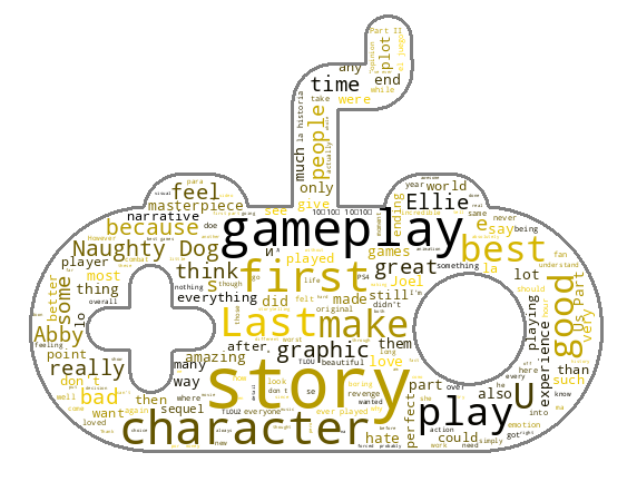

In [6]:
tlou2 = ["The Last of Us Part II"]
#Horizon Forbidden West
imprimeWordClouds(df, tlou2, 'tlou2')

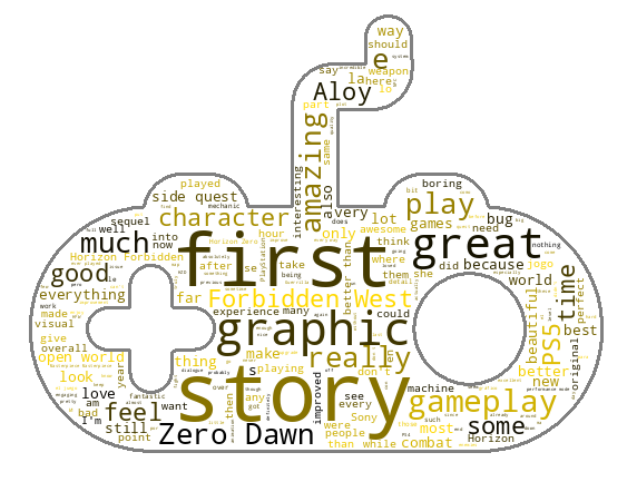

In [7]:
horizon = ["Horizon Forbidden West"]
#Horizon Forbidden West
imprimeWordClouds(df, horizon, 'horizon')

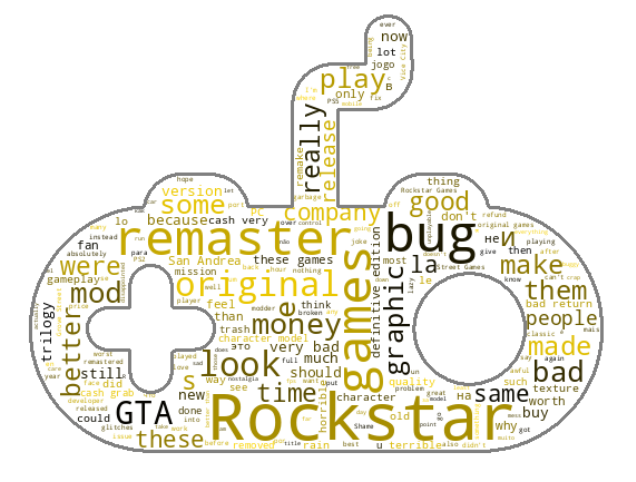

In [8]:
gta = ["Grand Theft Auto: The Trilogy - The Definitive Edition"]
#Horizon Forbidden West
imprimeWordClouds(df, gta, 'GTA')

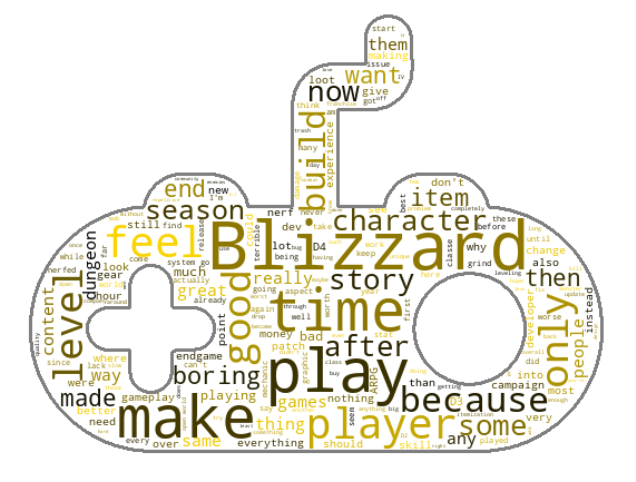

In [9]:
diablo = ['Diablo IV']
imprimeWordClouds(df, diablo, 'diablo')

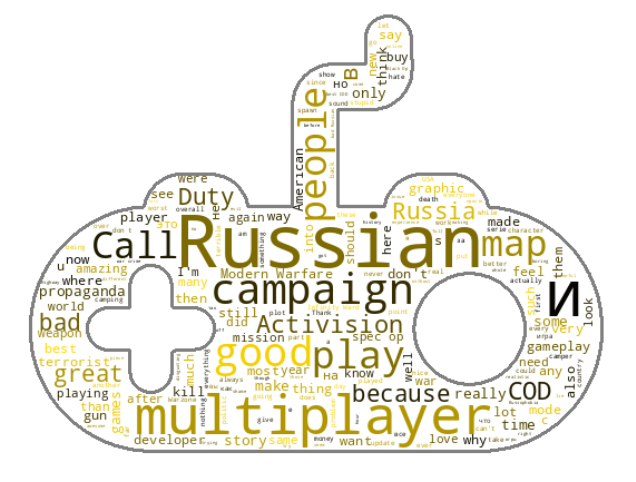

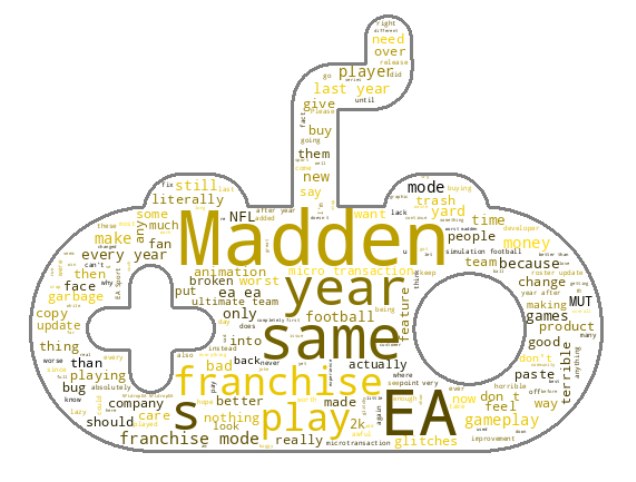

In [10]:
madden = ["Madden NFL 21", "Call of Duty: Modern Warfare"]
imprimeWordClouds(df, madden, 'madden')

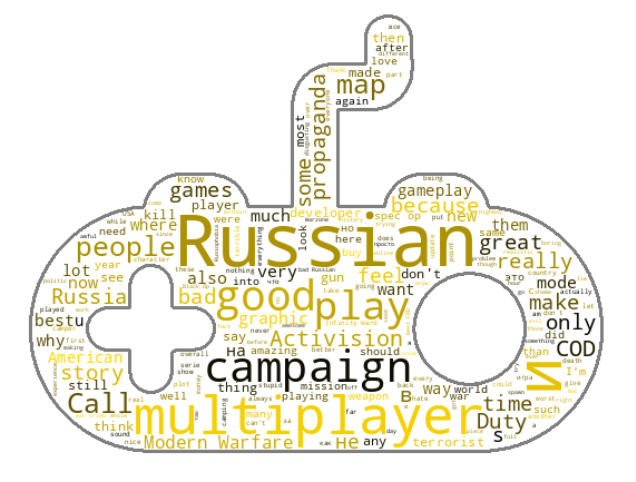

In [11]:
cod = ["Call of Duty: Modern Warfare"]
imprimeWordClouds(df, cod, 'cod')